<a href="https://colab.research.google.com/github/romenmeitei/Dengue-cases-in-Manipur/blob/main/Climate_data_acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Google Colab script provides the Data Acquisition of climatic and vegetative indicators in Manipur using GEE

## **Mapping of Manipur, India**
The region of interest (ROI) of Manuipur was determibed and visualized using Folium.

In [1]:
!pip install folium
import folium

# Coordinates for the polygon (ROI of Manipur)
roi_coordinates = [
    [25.683784, 94.593247], [25.692452, 94.570582], [25.612562, 94.487478], [25.593356, 94.424291],
    [25.536959, 94.413302], [25.504719, 94.321269], [25.492318, 94.214127], [25.52642, 94.184594],
    [25.546877, 94.186654], [25.549976, 94.154374], [25.5196, 94.139264], [25.530759, 94.08638],
    [25.546257, 94.093248], [25.593976, 94.015638], [25.564231, 93.966874], [25.540678, 93.767012],
    [25.498519, 93.748468], [25.483635, 93.808908], [25.203612, 93.598057], [25.304272, 93.469623],
    [25.209828, 93.359733], [25.138326, 93.334321], [25.048733, 93.294486], [25.047488, 93.26564],
    [25.007025, 93.242288], [24.800768, 93.177728], [24.817605, 93.116602], [24.712802, 93.081574],
    [24.489801, 93.037618], [24.256383, 93.004651], [24.116627, 92.96619], [24.063317, 93.134459],
    [24.02881, 93.256024], [24.097814, 93.349431], [24.073981, 93.420172], [23.972325, 93.462755],
    [23.950352, 93.537617], [24.004355, 93.757452], [23.920857, 93.804155], [23.898247, 94.047974],
    [23.836049, 94.133825], [24.084662, 94.262259], [24.231971, 94.29866], [24.456054, 94.414044],
    [24.7097, 94.563769], [24.926077, 94.705939], [25.11844, 94.752642], [25.168816, 94.661296],
    [25.210468, 94.577505], [25.362659, 94.629703], [25.465047, 94.687395], [25.514039, 94.558961],
    [25.591516, 94.559648], [25.667085, 94.596736], [25.683784, 94.593247]  # Closing the polygon
]

# Create a map centered at an approximate location of Manipur
map_center = [24.8, 93.9]  # Adjust as necessary
map_object = folium.Map(location=map_center, zoom_start=10)

# Add the polygon (ROI of Manipur) to the map
folium.Polygon(
    locations=roi_coordinates,
    color='blue',
    weight=2,
    fill=True,
    fill_color='blue',
    fill_opacity=0.4,
    popup="Manipur Region of Interest"
).add_to(map_object)

# Save the map to an HTML file
map_object.save("manipur_roi_map.html")

# Display the map in a Jupyter Notebook (if running in a notebook environment)
map_object


## **Data Acquisition
1. MODIS Land Surface Temperature
2. CHIRPS Precipitation
3. NDVI (Normalized Difference Vegetation Index)

<ipython-input-2-8699a9ef1a2b>:97: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)


Data Summary:
       Temperature (°C)  Precipitation (mm)         NDVI
count         72.000000           72.000000    72.000000
mean          23.868692          120.135817  6877.716846
std            3.905684          101.604570  1294.646772
min           15.762591            1.907460  2169.938951
25%           21.096190           27.051022  6434.564390
50%           25.229472          107.150828  7019.280137
75%           26.717584          194.799119  7862.398395
max           28.925444          385.387337  8530.463207


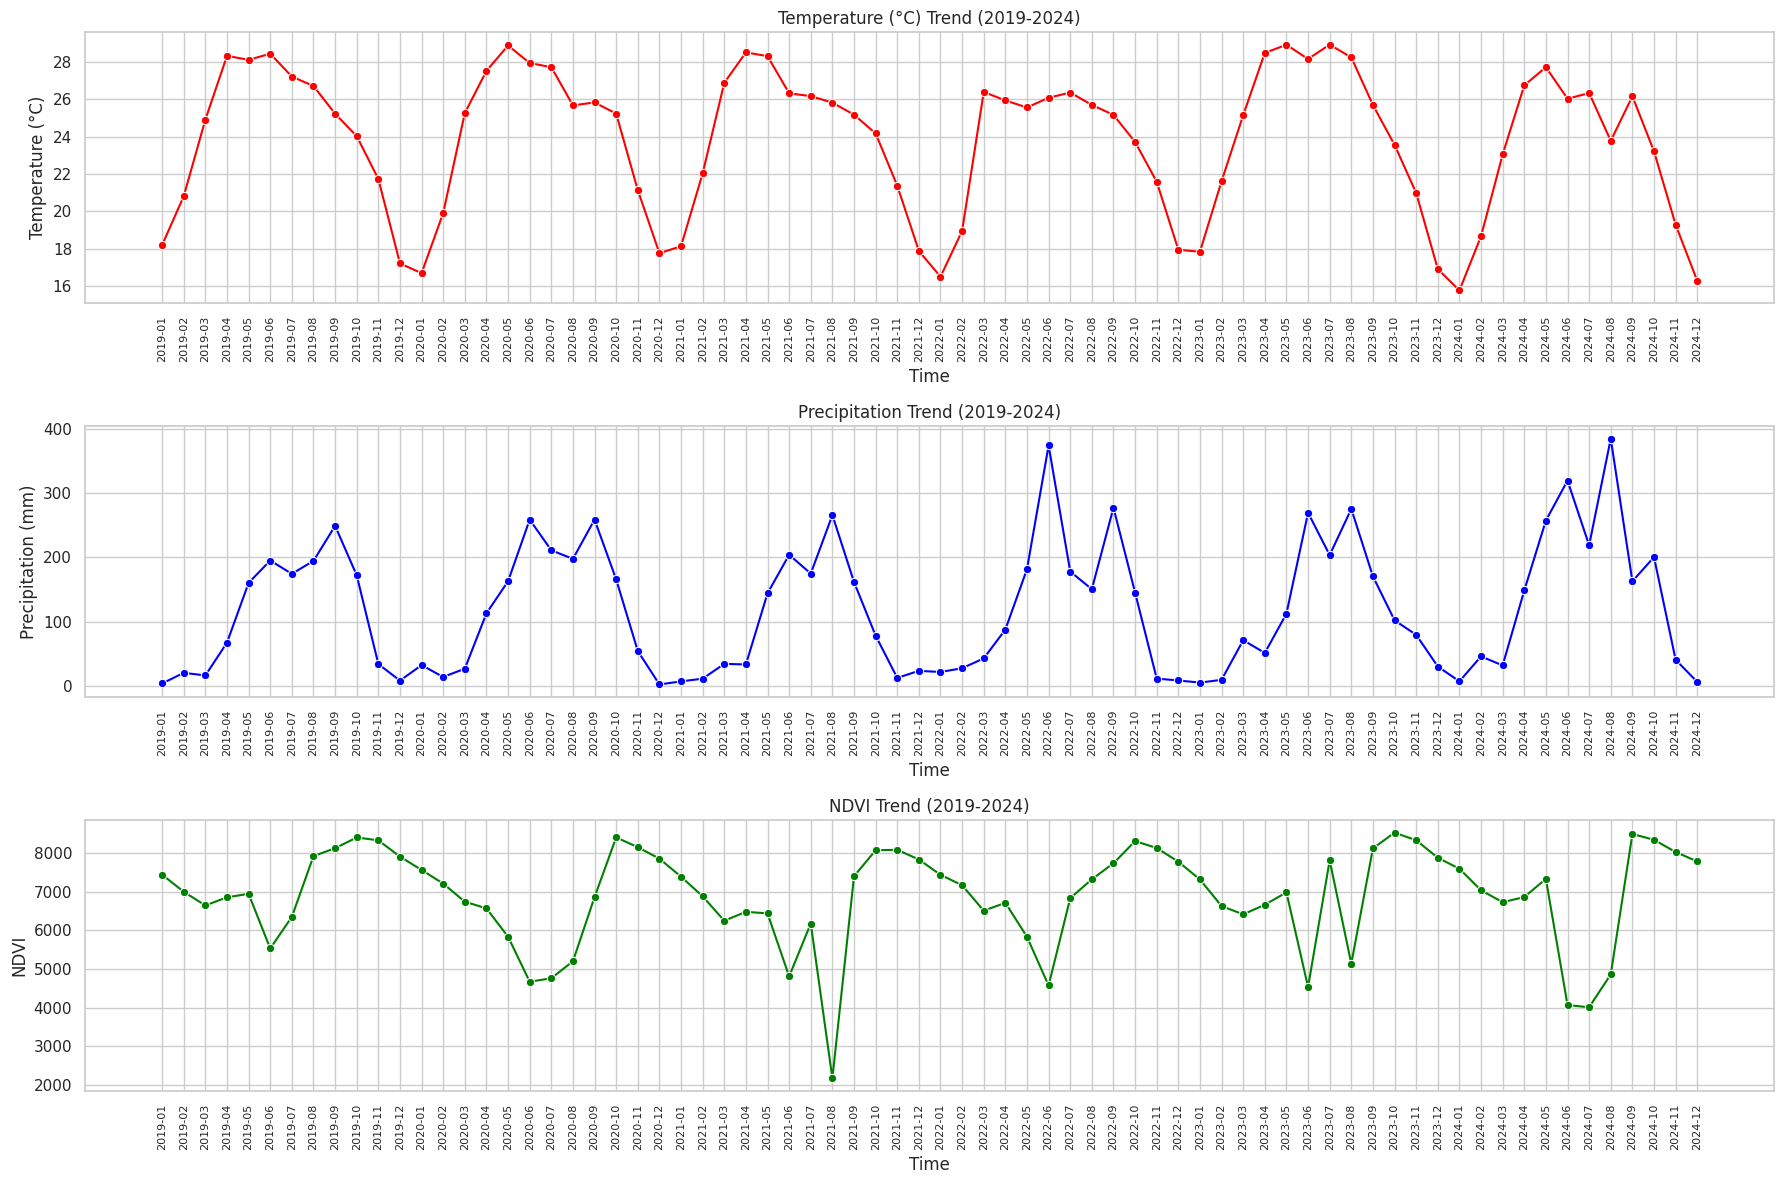

In [2]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Authenticate and initialize Earth Engine
try:
    ee.Initialize()
except ee.EEException:
    ee.Authenticate()
    ee.Initialize(project='woven-name-441217-g5')

# Define the region of interest (ROI) with updated coordinates
roi = ee.Geometry.Polygon([
    [
        [94.593247, 25.683784], [94.570582, 25.692452], [94.487478, 25.612562], [94.424291, 25.593356],
        [94.413302, 25.536959], [94.321269, 25.504719], [94.214127, 25.492318], [94.184594, 25.52642],
        [94.186654, 25.546877], [94.154374, 25.549976], [94.139264, 25.5196], [94.08638, 25.530759],
        [94.093248, 25.546257], [94.015638, 25.593976], [93.966874, 25.564231], [93.767012, 25.540678],
        [93.748468, 25.498519], [93.808908, 25.483635], [93.598057, 25.203612], [93.469623, 25.304272],
        [93.359733, 25.209828], [93.334321, 25.138326], [93.294486, 25.048733], [93.26564, 25.047488],
        [93.242288, 25.007025], [93.177728, 24.800768], [93.116602, 24.817605], [93.081574, 24.712802],
        [93.037618, 24.489801], [93.004651, 24.256383], [92.96619, 24.116627], [93.134459, 24.063317],
        [93.256024, 24.02881], [93.349431, 24.097814], [93.420172, 24.073981], [93.462755, 23.972325],
        [93.537617, 23.950352], [93.757452, 24.004355], [93.804155, 23.920857], [94.047974, 23.898247],
        [94.133825, 23.836049], [94.262259, 24.084662], [94.29866, 24.231971], [94.414044, 24.456054],
        [94.563769, 24.7097], [94.705939, 24.926077], [94.752642, 25.11844], [94.661296, 25.168816],
        [94.577505, 25.210468], [94.629703, 25.362659], [94.687395, 25.465047], [94.558961, 25.514039],
        [94.559648, 25.591516], [94.596736, 25.667085], [94.593247, 25.683784]
    ]
])

# Define the study period
start_year = 2019
end_year = 2024
months = range(1, 13)

# Initialize lists for storing data
temperature_data, precipitation_data, ndvi_data, time_labels = [], [], [], []

# Function to fetch MODIS LST (temperature)
def get_temperature(year, month):
    dataset = ee.ImageCollection("MODIS/061/MOD11A2").filterDate(
        f"{year}-{month:02d}-01", f"{year}-{month:02d}-28"
    ).filterBounds(roi)

    if dataset.size().getInfo() > 0:
        lst_day = dataset.select("LST_Day_1km").mean().multiply(0.02).subtract(273.15)
        lst_mean = lst_day.reduceRegion(
            reducer=ee.Reducer.mean(), geometry=roi, scale=1000, maxPixels=1e13
        )
        return lst_mean.getInfo().get("LST_Day_1km", None)
    else:
        return None

# Function to fetch CHIRPS precipitation data
def get_precipitation(year, month):
    dataset = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY").filterDate(
        f"{year}-{month:02d}-01", f"{year}-{month:02d}-28"
    ).filterBounds(roi)

    precipitation = dataset.select("precipitation").sum()
    precipitation_mean = precipitation.reduceRegion(
        reducer=ee.Reducer.mean(), geometry=roi, scale=5000, maxPixels=1e13
    )
    return precipitation_mean.getInfo().get("precipitation", None)

# Function to fetch MODIS NDVI
def get_ndvi(year, month):
    dataset = ee.ImageCollection("MODIS/061/MOD13A2").filterDate(
        f"{year}-{month:02d}-01", f"{year}-{month:02d}-28"
    ).filterBounds(roi)
    ndvi = dataset.select("NDVI").mean()
    ndvi_mean = ndvi.reduceRegion(
        reducer=ee.Reducer.mean(), geometry=roi, scale=500, maxPixels=1e13
    )
    return ndvi_mean.getInfo().get("NDVI", None)

# Fetch data for each year and month
for year in range(start_year, end_year + 1):
    for month in months:
        temperature_data.append(get_temperature(year, month) or np.nan)
        precipitation_data.append(get_precipitation(year, month) or np.nan)
        ndvi_data.append(get_ndvi(year, month) or np.nan)
        time_labels.append(f"{year}-{month:02d}")

# Create a DataFrame
df = pd.DataFrame({
    "Time": time_labels,
    "Temperature (°C)": temperature_data,
    "Precipitation (mm)": precipitation_data,
    "NDVI": ndvi_data
})

# Interpolate missing data
df.interpolate(method="linear", inplace=True)

# Summary
print("Data Summary:")
print(df.describe())

# Plotting with Seaborn for improved aesthetics
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 12))

# Temperature
plt.subplot(3, 1, 1)
sns.lineplot(x="Time", y="Temperature (°C)", data=df, marker="o", color="red")
plt.title("Temperature (°C) Trend (2019-2024)")
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Temperature (°C)")
plt.grid(True)

# Precipitation
plt.subplot(3, 1, 2)
sns.lineplot(x="Time", y="Precipitation (mm)", data=df, marker="o", color="blue")
plt.title("Precipitation Trend (2019-2024)")
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Precipitation (mm)")
plt.grid(True)

# NDVI
plt.subplot(3, 1, 3)
sns.lineplot(x="Time", y="NDVI", data=df, marker="o", color="green")
plt.title("NDVI Trend (2019-2024)")
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("NDVI")
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
df.to_csv("generated_climate_data.csv", index=False)
from google.colab import files
files.download("generated_climate_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plotting of Trends of Temperature, Precipitation, and NDVI

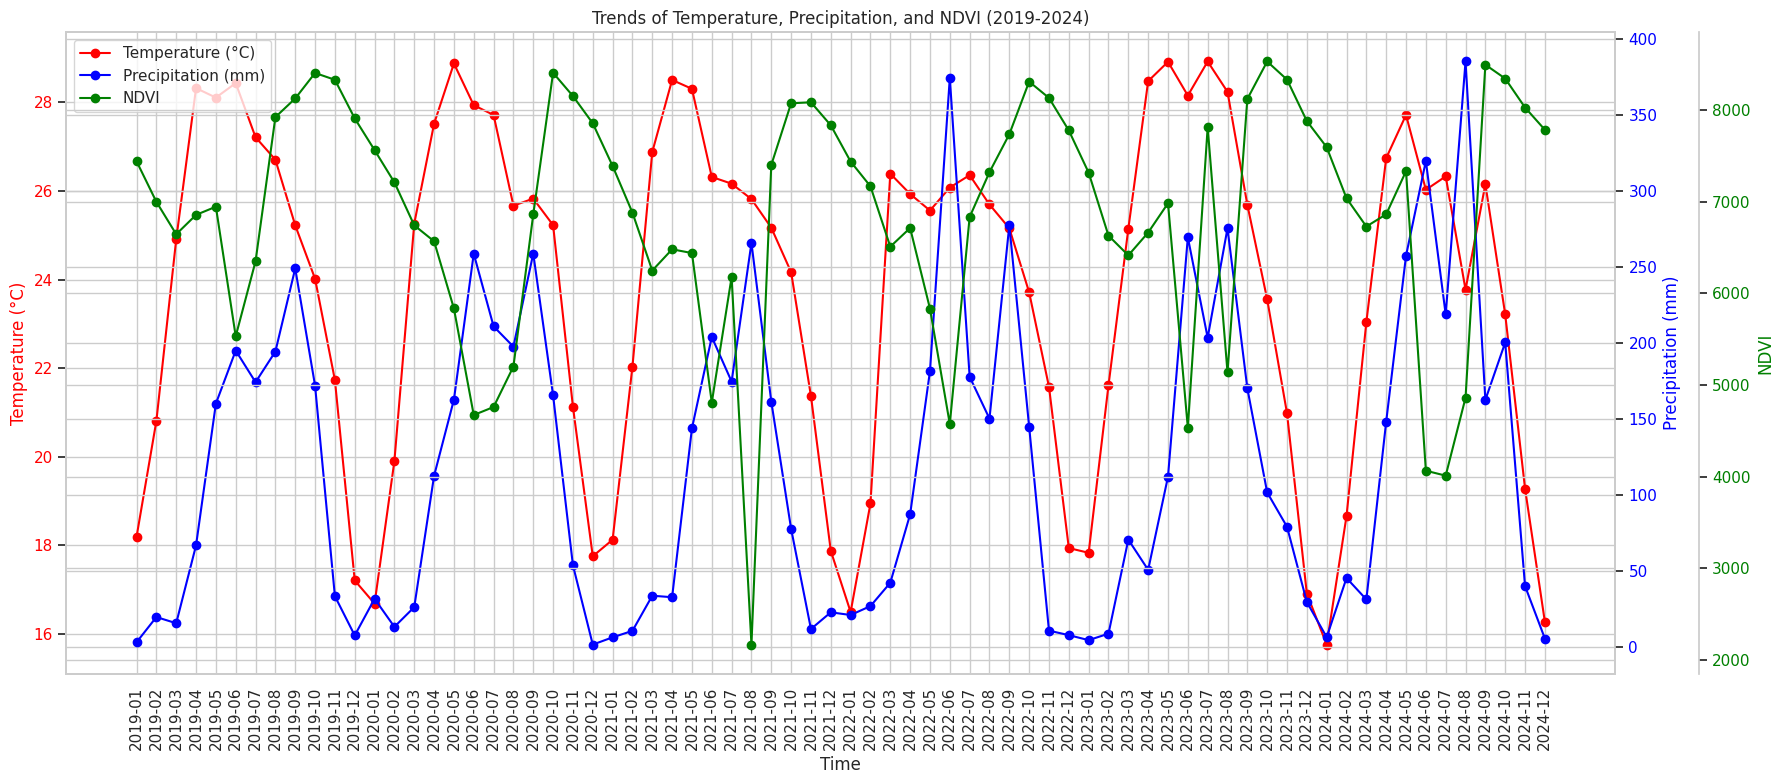

In [4]:
# Combined Plot with Multiple Y-Axes
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Temperature on the primary y-axis
ax1.plot(df["Time"], df["Temperature (°C)"], marker="o", color="red", label="Temperature (°C)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.tick_params(axis="x", rotation=90)
ax1.grid(True)

# Create a twin y-axis for Precipitation
ax2 = ax1.twinx()
ax2.plot(df["Time"], df["Precipitation (mm)"], marker="o", color="blue", label="Precipitation (mm)")
ax2.set_ylabel("Precipitation (mm)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Create another y-axis for NDVI
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # Offset the third axis
ax3.plot(df["Time"], df["NDVI"], marker="o", color="green", label="NDVI")
ax3.set_ylabel("NDVI", color="green")
ax3.tick_params(axis="y", labelcolor="green")

# Add a legend
lines, labels = [], []
for ax in [ax1, ax2, ax3]:
    line, label = ax.get_legend_handles_labels()
    lines.extend(line)
    labels.extend(label)
ax1.legend(lines, labels, loc="upper left")

# Title
plt.title("Trends of Temperature, Precipitation, and NDVI (2019-2024)")
plt.tight_layout()
plt.show()
